Class distribution before SMOTE: Counter({2: 284, 1: 239, 0: 233, 3: 172})
Class distribution after SMOTE: Counter({2: 284, 0: 284, 1: 284, 3: 284})


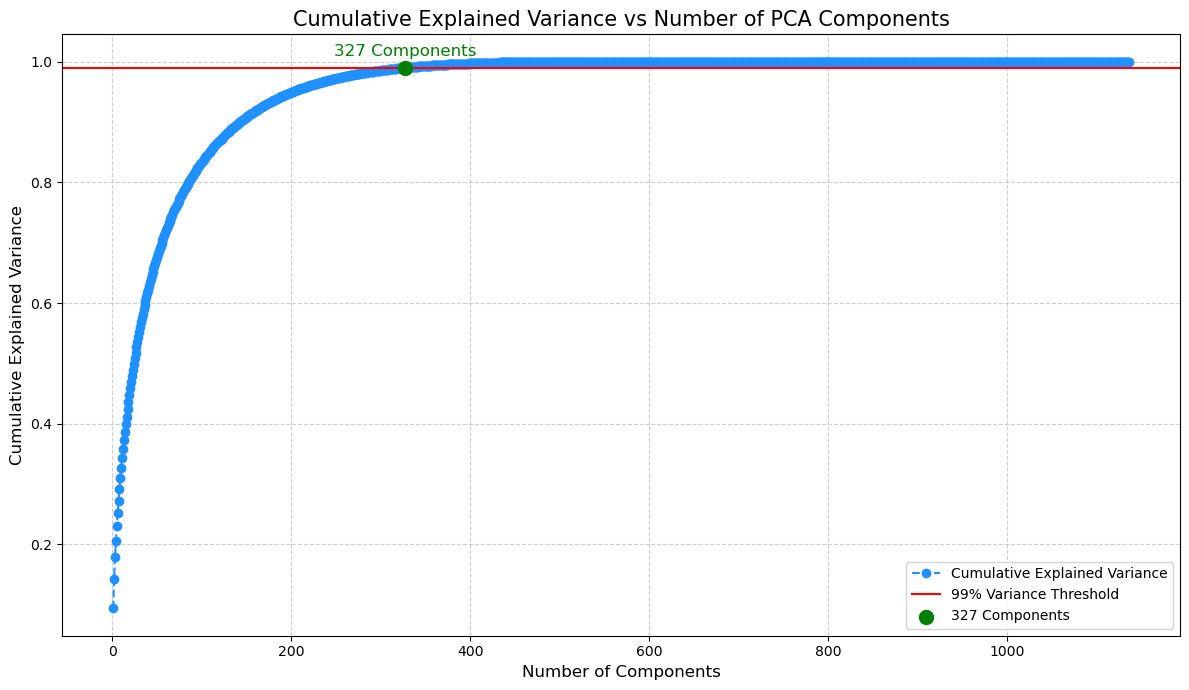

Original dimensionality: 3060
Reduced dimensionality after PCA (99% variance): 327
PCA dataset saved successfully.


In [13]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Load data
df = pd.read_csv(r"C:\Users\sihus\OneDrive\Desktop\MAJOR PROJECT 2024\encoded_cleaned_combined_data.csv")
X = df.drop("Target", axis=1)
y = df["Target"]

# SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Class distribution before SMOTE:", Counter(y))
print("Class distribution after SMOTE:", Counter(y_resampled))

# Standard Scaling
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

# PCA (full for graph)
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_resampled_scaled)

explained_variance = np.cumsum(pca_full.explained_variance_ratio_)
n_components_99 = np.argmax(explained_variance >= 0.99) + 1

# Plot cumulative variance graph
plt.figure(figsize=(12, 7))
plt.plot(range(1, len(explained_variance) + 1), explained_variance,
         marker='o', linestyle='--', color='dodgerblue', label='Cumulative Explained Variance')

plt.axhline(y=0.99, color='red', linestyle='-', label='99% Variance Threshold')
plt.scatter(n_components_99, explained_variance[n_components_99 - 1],
            color='green', s=100, zorder=5, label=f'{n_components_99} Components')

plt.text(n_components_99, explained_variance[n_components_99 - 1] + 0.02,
         f'{n_components_99} Components', ha='center', fontsize=12, color='green')

plt.title('Cumulative Explained Variance vs Number of PCA Components', fontsize=15)
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# Print dimensionality info
print(f"Original dimensionality: {X_resampled.shape[1]}")
print(f"Reduced dimensionality after PCA (99% variance): {n_components_99}")

# Apply PCA using 99% variance
pca = PCA(n_components=0.99)
X_resampled_pca = pca.fit_transform(X_resampled_scaled)

# Save PCA-reduced dataset
pca_df = pd.DataFrame(X_resampled_pca)
pca_df['Target'] = y_resampled
pca_df.to_csv(r"C:\Users\sihus\OneDrive\Desktop\MAJOR PROJECT 2024\pca_resampled_data.csv", index=False)

print("PCA dataset saved successfully.")


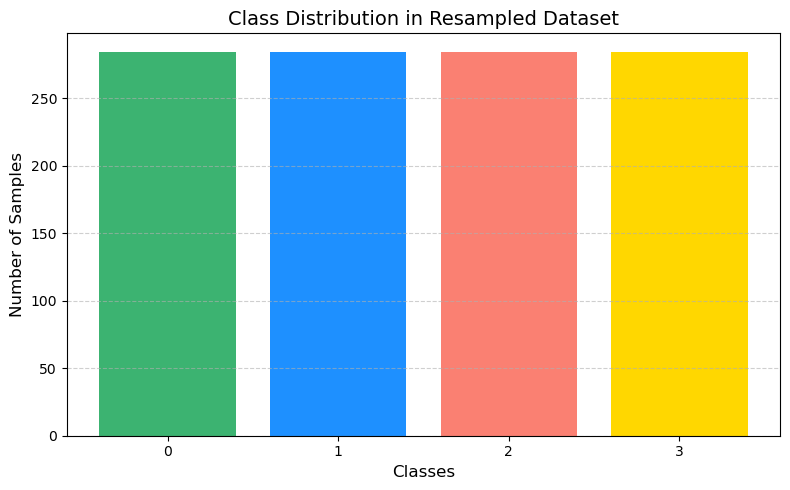

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load PCA-resampled dataset
pca_df = pd.read_csv(r"C:\Users\sihus\OneDrive\Desktop\MAJOR PROJECT 2024\pca_resampled_data.csv")

# Plot class distribution with 4 different colors
plt.figure(figsize=(8, 5))
class_counts = pca_df['Target'].value_counts().sort_index()

colors = ['mediumseagreen', 'dodgerblue', 'salmon', 'gold']  
bars = plt.bar(class_counts.index.astype(str), class_counts.values, color=colors[:len(class_counts)])

plt.title('Class Distribution in Resampled Dataset', fontsize=14)
plt.xlabel('Classes', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
